In [1]:
from scipy import io
import scipy
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, TimeDistributed, LSTM
import cv2
import imageio
import matplotlib.image as mpimg

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load data and display keys 
p1_1 = io.loadmat("patient_001_DSA_1")
p1_2 = io.loadmat("patient_001_DSA_2")
p1_3 = io.loadmat("patient_001_DSA_3")
p1_4 = io.loadmat("patient_001_DSA_4")
p2_1 = io.loadmat("patient_002_DSA_1")
p1_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fileInfo', 'X', 'frameTime', 'CBF', 'CBV', 'MTT', 'TTP', 'Peak', 'CBF_cut', 'CBV_cut'])

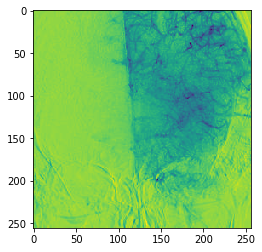

(256, 256)


In [3]:
# check image dimensions
sample_img = p1_1['X'][:, :, 10]
#sample_img_uint8 = sample_img.astype('uint8')
imageio.imwrite('sample_img.jpg', sample_img) 
img = mpimg.imread('sample_img.jpg')
plt.imshow(img)
plt.show()

print(sample_img.shape)




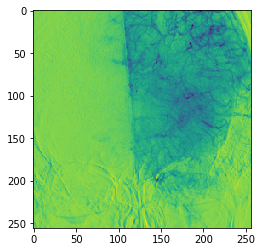

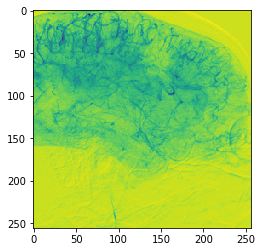

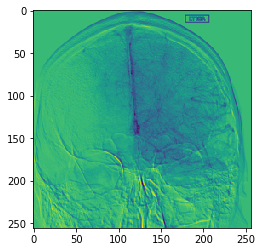

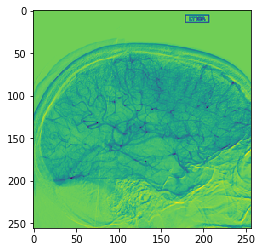

In [4]:
# display images from different views at a certain frame 
i = 10
plt.imshow(p1_1['X'][:, :, i]) 
plt.show()
plt.imshow(p1_2['X'][:, :, i])
plt.show()
plt.imshow(p1_3['X'][:, :, i])
plt.show()
plt.imshow(p1_4['X'][:, :, i])
plt.show()


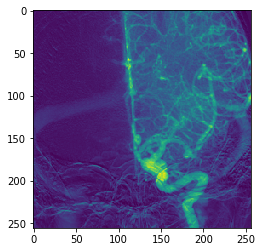

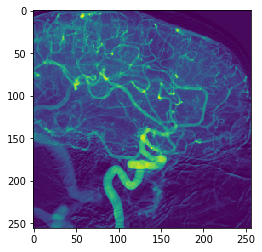

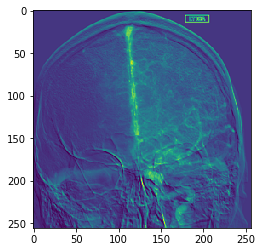

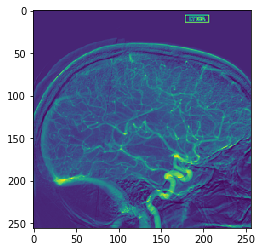

In [5]:
# display param images for CBF 
plt.imshow(p1_1['CBF'])
plt.show()
plt.imshow(p1_2['CBF'])
plt.show()
plt.imshow(p1_3['CBF'])
plt.show()
plt.imshow(p1_4['CBF'])

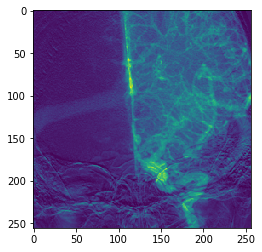

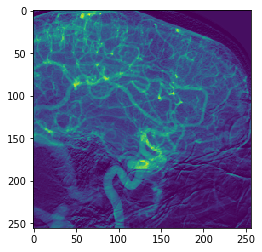

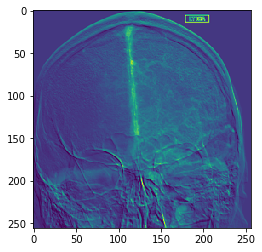

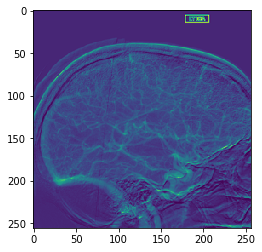

In [78]:
# display param images for CBV
plt.imshow(p1_1['CBV'])
plt.show()
plt.imshow(p1_2['CBV'])
plt.show()
plt.imshow(p1_3['CBV'])
plt.show()
plt.imshow(p1_4['CBV'])

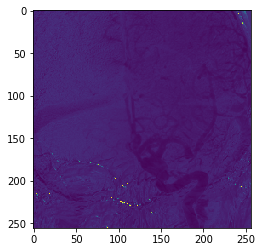

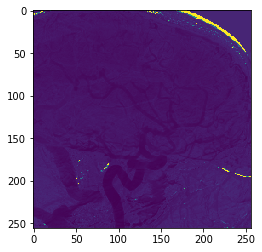

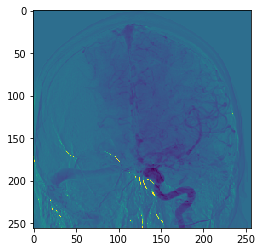

TypeError: Required argument 'dsize' (pos 2) not found

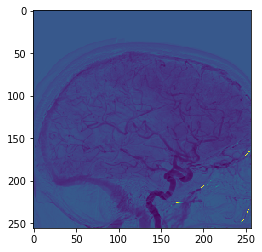

In [11]:
# display param images for MTT
plt.imshow(p1_1['MTT'])
plt.show()
plt.imshow(p1_2['MTT'])
plt.show()
plt.imshow(p1_3['MTT'])
plt.show()
plt.imshow(p1_4['MTT'])

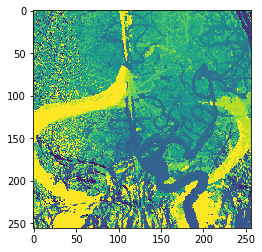

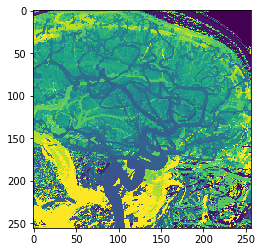

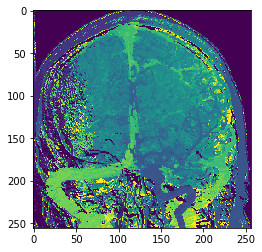

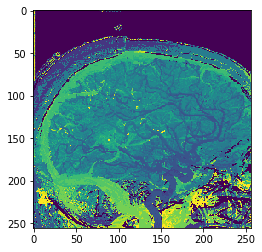

In [80]:
# display param images for TTP
plt.imshow(p1_1['TTP'])
plt.show()
plt.imshow(p1_2['TTP'])
plt.show()
plt.imshow(p1_3['TTP'])
plt.show()
plt.imshow(p1_4['TTP'])

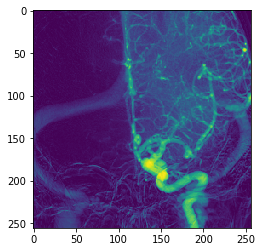

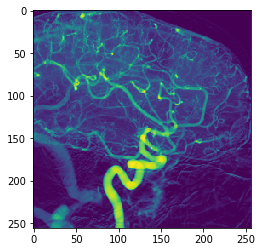

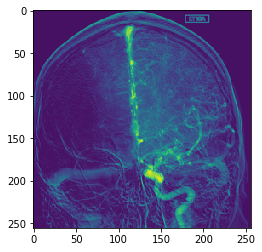

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


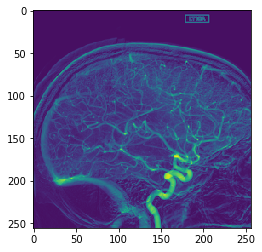

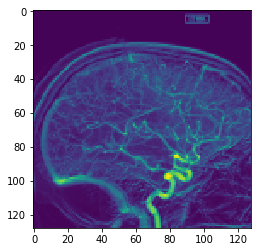

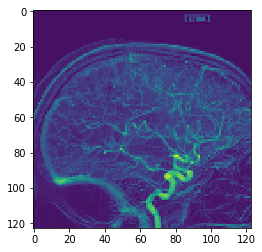

In [21]:
# display param images for Peak
plt.imshow(p1_1['Peak'])
plt.show()
plt.imshow(p1_2['Peak'])
plt.show()
plt.imshow(p1_3['Peak'])
plt.show()
plt.imshow(p1_4['Peak'])

from skimage.transform import resize
img_resized = resize(p1_4['Peak'], (256/2., 256/2.))
plt.show()
plt.imshow(img_resized)

img_resized_csv = cv2.resize(p1_4['Peak'], dsize=(123, 123), interpolation=cv2.INTER_CUBIC)
plt.show()
plt.imshow(img_resized_csv)

In [8]:
# zero mean function 
def zero_mean(data, key):
    data[key] -= np.mean(data[key], axis=0)
    return data[key]

p1_1_zeroX = zero_mean(p1_1, 'X')
p1_2_zeroX = zero_mean(p1_2, 'X')
p1_3_zeroX = zero_mean(p1_3, 'X')
p1_4_zeroX = zero_mean(p1_4, 'X')

p2_1_zeroX = zero_mean(p2_1, 'X')

p1_1_zeroCBF = zero_mean(p1_1, 'CBF')
p2_1_zeroCBF = zero_mean(p2_1, 'CBF')

print(np.shape(p1_1_zeroX))

(256, 256, 20)


In [16]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

seq = Sequential()
seq.add(ConvLSTM2D(filters=32, kernel_size=(5, 5),
                   input_shape=(20, 256, 256, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=48, kernel_size=(5, 5),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=64, kernel_size=(3, 3),
                   padding='same', return_sequences=False))
seq.add(BatchNormalization())

seq.add(Conv2D(filters=1, kernel_size=(3,3),
               activation='relu',
               padding='same', data_format='channels_last'))
seq.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

(256, 256, 20)


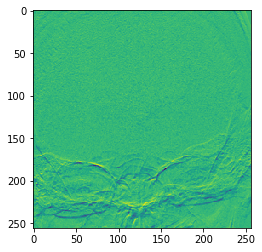

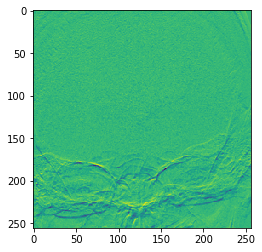

(20, 256, 256)

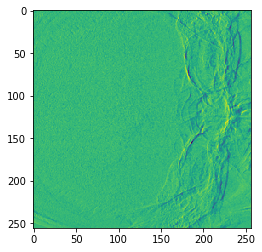

In [15]:
#np.shape(p1_1_zeroX)

print(p1_1_zeroX.shape)
p1_1_zeroX_m = np.moveaxis(p1_1_zeroX, -1, 0)

p1_1_zeroX_T = np.transpose(p1_1_zeroX)
p2_1_zeroX_T = np.transpose(p2_1_zeroX)
#p1_1_zeroCBF_T = np.transpose(p1_1_zeroCBF)

plt.imshow(p1_1_zeroX[:, :, 0])
plt.show()
plt.imshow(p1_1_zeroX_m[0, :, :])
plt.show()
plt.imshow(p1_1_zeroX_T[0, :, :])

np.shape(p1_1_zeroX_m)
#p1_1_zeroX_T = p1_1_zeroX_T[np.newaxis,..., np.newaxis]
#p2_1_zeroX_T = p2_1_zeroX_T[np.newaxis,..., np.newaxis]

#p1_1_zeroCBF_T = p1_1_zeroCBF_T[np.newaxis, ..., np.newaxis]

#print(np.shape(p1_1_zeroX_T))
#print(np.shape(p1_1_zeroCBF_T))

#seq.fit(p1_1_zeroX_T, p1_1_zeroCBF_T, batch_size=1, epochs=1)

In [15]:
p2_1_zeroCBF_pred = seq.predict(p2_1_zeroX_T)

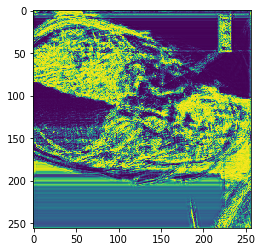

In [18]:
# training on one patient, one view 
p2_1_zeroCBF_show = np.squeeze(p2_1_zeroCBF_pred)
plt.imshow(p2_1_zeroCBF_show)


In [180]:
print("X train shape: ", np.shape(p1_1_zeroX))
print("X test shape: ", np.shape(p2_1_zeroX))
print("Y train shape: ", np.shape(p1_1_zeroCBF))
print("Y test shape: ", np.shape(p2_1_zeroCBF))




X train shape:  (256, 256, 20)
X test shape:  (256, 256, 20)
Y train shape:  (256, 256)
Y test shape:  (256, 256)


In [18]:
# inputs fileName, key, outputs data 
def data_processing(fileName, key):
    # load file 
    data = io.loadmat(fileName)
    
    # subtract mean from data from key 
    data[key] -= np.mean(data[key], axis=0)
    
    # move frames to front if key equals X 
    if (key == 'X'):
        data_key = np.moveaxis(data[key], -1, 0)
    else:
        data_key = data[key]

    # add channel dimension 
    data_key = data_key[np.newaxis,..., np.newaxis]

    return data_key




(3, 20, 256, 256, 1)
(1, 20, 256, 256, 1)


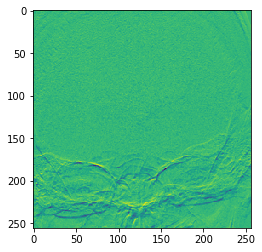

In [38]:
p1_func = data_processing("patient_001_DSA_1", 'X')
p2_func = data_processing("patient_002_DSA_1", 'X')
p3_func = data_processing("patient_003_DSA_1", "X")
hi = np.vstack((p1_func, p3_func))
hi_2 = np.vstack((hi, p2_func))
print(hi_2.shape)

print(p1_func.shape)
plt.imshow(hi_2[0, 0, :, :, -1])


In [80]:
trainDir = "/Users/ebrahimfeghhi/Desktop/Train_Files"
cvDir =  "/Users/ebrahimfeghhi/Desktop/Cross_Val_Files"

def file_grabber(numFiles, view, directory):
    counter = 0 
    for tr in sorted(os.listdir( directory )) :
        fileName = directory + "/" + tr
        if (np.int(fileName[-5]) == view):
            X = data_processing(fileName, 'X')
            Y = data_processing(fileName, 'CBF')
        else:
            continue
        if (counter == 0):
            X_5D = X
            Y_5D = Y
        else:
            X_5D = np.vstack((X_5D, X))
            Y_5D = np.vstack((Y_5D, Y))
        
        counter += 1

        if (counter >= numFiles):
            return X_5D, Y_5D
            break


In [84]:
X_train_5D, Y_train_4D = file_grabber(10, 1, trainDir)
X_test_5D, Y_test_4D = file_grabber(3, 1, cvDir)

print(np.shape(X_train_5D))
print(np.shape(Y_train_4D))
print(np.shape(X_test_5D))
print(np.shape(Y_test_4D))

(10, 20, 256, 256, 1)
(10, 256, 256, 1)
(3, 20, 256, 256, 1)
(3, 256, 256, 1)


In [27]:
p1_1_X = data_processing("patient_001_DSA_1", 'X')
p1_2_X = data_processing("patient_002_DSA_1", 'X')
p1_3_X = data_processing("patient_003_DSA_1", 'X')
p1_4_X = data_processing("patient_004_DSA_1", 'X')
p1_5_X = data_processing("patient_005_DSA_1", 'X')
p1_6_X = data_processing("patient_006_DSA_1", 'X')
p1_7_X = data_processing("patient_007_DSA_1", 'X')
p1_8_X = data_processing("patient_008_DSA_1", 'X')
p1_9_X = data_processing("patient_009_DSA_1", 'X')

print(np.shape(p1_1_X), np.shape(p1_9_X), np.shape(p1_7_X), np.shape(p1_5_X))

p1_10_X = data_processing("patient_010_DSA_1", 'X')
p1_11_X = data_processing("patient_011_DSA_1", 'X')
p1_12_X = data_processing("patient_012_DSA_1", 'X')

X_train = np.stack((p1_1_X, p1_2_X, p1_3_X, p1_4_X, p1_5_X, p1_6_X, p1_7_X, p1_8_X, p1_9_X))
X_test = np.stack((p1_10_X, p1_11_X, p1_12_X))


(1, 20, 256, 256, 1) (1, 20, 256, 256, 1) (1, 20, 256, 256, 1) (1, 20, 256, 256, 1)


In [47]:
p1_1_CBF = data_processing("patient_001_DSA_1", 'CBF')
p1_2_CBF = data_processing("patient_002_DSA_1", 'CBF')
p1_3_CBF = data_processing("patient_003_DSA_1", 'CBF')
p1_4_CBF = data_processing("patient_004_DSA_1", 'CBF')
p1_5_CBF = data_processing("patient_005_DSA_1", 'CBF')
p1_6_CBF = data_processing("patient_006_DSA_1", 'CBF')
p1_7_CBF = data_processing("patient_007_DSA_1", 'CBF')
p1_8_CBF = data_processing("patient_008_DSA_1", 'CBF')
p1_9_CBF = data_processing("patient_009_DSA_1", 'CBF')

p1_10_CBF = data_processing("patient_010_DSA_1", 'CBF')
p1_11_CBF = data_processing("patient_011_DSA_1", 'CBF')
p1_12_CBF = data_processing("patient_011_DSA_1", 'CBF')

Y_train = np.stack((p1_1_CBF, p1_2_CBF, p1_3_CBF, p1_4_CBF, p1_5_CBF, p1_6_CBF, p1_7_CBF, p1_8_CBF, p1_9_CBF))
Y_test = np.stack((p1_10_CBF, p1_11_CBF, p1_12_CBF))




In [6]:
seq.fit(X_train_5D, Y_train_4D, batch_size=1, epochs=2)

Epoch 1/10
13/13 [==============================] - 1482s 114s/step - loss: 1.7278 - mean_squared_error: 1.7278 - mean_absolute_error: 0.7613
Epoch 2/10
13/13 [==============================] - 1543s 119s/step - loss: 1.5622 - mean_squared_error: 1.5622 - mean_absolute_error: 0.6521
Epoch 3/10
13/13 [==============================] - 1565s 120s/step - loss: 1.5055 - mean_squared_error: 1.5055 - mean_absolute_error: 0.6057
Epoch 4/10
13/13 [==============================] - 1548s 119s/step - loss: 1.4803 - mean_squared_error: 1.4803 - mean_absolute_error: 0.5824
Epoch 5/10
13/13 [==============================] - 1556s 120s/step - loss: 1.4673 - mean_squared_error: 1.4673 - mean_absolute_error: 0.5688
Epoch 6/10
13/13 [==============================] - 1520s 117s/step - loss: 1.4576 - mean_squared_error: 1.4576 - mean_absolute_error: 0.5595
Epoch 7/10
13/13 [==============================] - 1592s 122s/step - loss: 1.4524 - mean_squared_error: 1.4524 - mean_absolute_error: 0.5548
Epoch 

In [7]:
pred_imgs = seq.predict(X_test_5D)

In [51]:
np.shape(pred_imgs)

(3, 256, 256, 1)

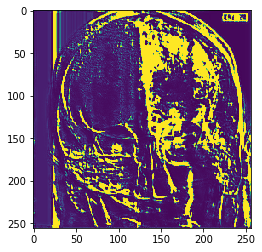

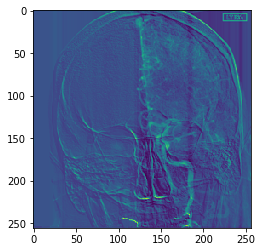

In [73]:
img_10 = pred_imgs[0, :, :, -1]
np.shape(img_10)
plt.imshow(img_10.T)
plt.show()
plt.imshow(np.squeeze(p1_10_CBF).T)

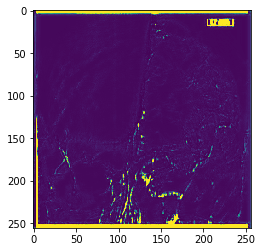

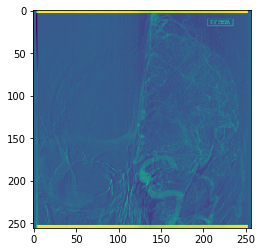

In [74]:
img_11 = pred_imgs[1, :, :, -1]
np.shape(img_11)
plt.imshow(img_11.T)
plt.show()
plt.imshow(np.squeeze(p1_11_CBF).T)

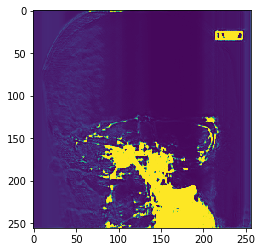

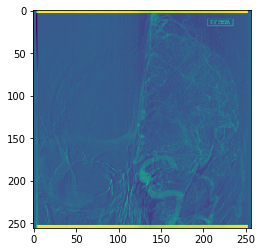

In [75]:
img_12 = pred_imgs[2, :, :, -1]
np.shape(img_12)
plt.imshow(img_12.T)
plt.show()
plt.imshow(np.squeeze(p1_12_CBF).T)

In [63]:
img_12 = pred_imgs[2, :, :, -1]

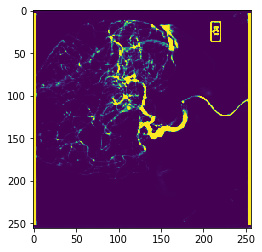

In [10]:
img_12 = pred_imgs[2, :, :, -1]
np.shape(img_12)
plt.imshow(img_12.T)
plt.show()

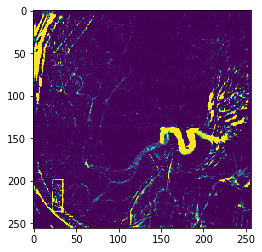

In [11]:
img_12 = pred_imgs[3, :, :, -1]
np.shape(img_12)
plt.imshow(img_12.T)
plt.show()

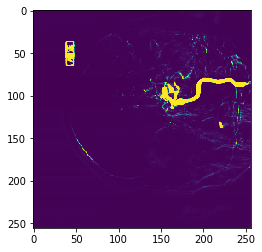

In [12]:
img_12 = pred_imgs[1, :, :, -1]
np.shape(img_12)
plt.imshow(img_12.T)
plt.show()